# Allocated Project 1

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import re
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
df = pd.read_csv('tips.csv')

In [13]:
X = df[['total_bill']]  # predictor variable
y = df['tip']            # target variable


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
def extract_total_bill(query):
    match = re.search(r'\$?(\d+(\.\d+)?)', query)
    if match:
        return float(match.group(1))
    return None

In [17]:
def predict_tip(total_bill):
    if total_bill is None:
        return "Sorry, I couldn't understand the bill amount from your query."
    predicted_tip = model.predict([[total_bill]])[0]
    return predicted_tip

In [25]:
def chatbot():
    print("Welcome to the Tip Predictor Bot!")
    while True:
        user_input = input("You: ").strip().lower()
        
        if user_input == 'exit':
            print("Bot: Bye!")
            return  
        
        total_bill = extract_total_bill(user_input)
        if total_bill is not None:
            predicted_tip = predict_tip(total_bill)
            print(f"Bot: Predicted tip amount for ${total_bill:.2f} bill is ${predicted_tip:.2f}")
        else:
            print("Bot: I'm sorry, I couldn't understand your query.")

    
    print("Chatbot session ended.")


chatbot()


Welcome to the Tip Predictor Bot!
You: tip for $5?


D:\Anancconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Bot: Predicted tip amount for $5.00 bill is $1.51
You: tip for $15?


D:\Anancconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Bot: Predicted tip amount for $15.00 bill is $2.48
You: tip for $100?


D:\Anancconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Bot: Predicted tip amount for $100.00 bill is $10.71
You: exit
Bot: Bye!


In [31]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

In [34]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    print(f'{model.__class__.__name__} Performance:')
    print(f'MSE (Train): {mse_train:.2f}, MSE (Test): {mse_test:.2f}')
    print(f'R² (Train): {r2_train:.2f}, R² (Test): {r2_test:.2f}')
    print('-------------------------------------')

# Evaluate each model
for name, model in models.items():
    print(name)
    evaluate_model(model, X_train, X_test, y_train, y_test)

Linear Regression
LinearRegression Performance:
MSE (Train): 1.10, MSE (Test): 0.82
R² (Train): 0.42, R² (Test): 0.59
-------------------------------------
Decision Tree
DecisionTreeRegressor Performance:
MSE (Train): 0.03, MSE (Test): 1.93
R² (Train): 0.99, R² (Test): 0.04
-------------------------------------
Random Forest
RandomForestRegressor Performance:
MSE (Train): 0.25, MSE (Test): 1.17
R² (Train): 0.87, R² (Test): 0.42
-------------------------------------
Gradient Boosting
GradientBoostingRegressor Performance:
MSE (Train): 0.37, MSE (Test): 1.07
R² (Train): 0.80, R² (Test): 0.47
-------------------------------------
Support Vector Regressor
SVR Performance:
MSE (Train): 1.12, MSE (Test): 0.92
R² (Train): 0.40, R² (Test): 0.54
-------------------------------------


In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("\nResults after applying PCA:")
# Evaluate each model again after PCA
for name, model in models.items():
    print(name)
    evaluate_model(model, X_train_pca, X_test_pca, y_train, y_test)


Results after applying PCA:
Linear Regression
LinearRegression Performance:
MSE (Train): 1.10, MSE (Test): 0.82
R² (Train): 0.42, R² (Test): 0.59
-------------------------------------
Decision Tree
DecisionTreeRegressor Performance:
MSE (Train): 0.03, MSE (Test): 1.96
R² (Train): 0.99, R² (Test): 0.03
-------------------------------------
Random Forest
RandomForestRegressor Performance:
MSE (Train): 0.25, MSE (Test): 1.17
R² (Train): 0.87, R² (Test): 0.42
-------------------------------------
Gradient Boosting
GradientBoostingRegressor Performance:
MSE (Train): 0.37, MSE (Test): 1.07
R² (Train): 0.80, R² (Test): 0.47
-------------------------------------
Support Vector Regressor
SVR Performance:
MSE (Train): 1.12, MSE (Test): 0.92
R² (Train): 0.40, R² (Test): 0.54
-------------------------------------


# Exploratory Data Analysis

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram

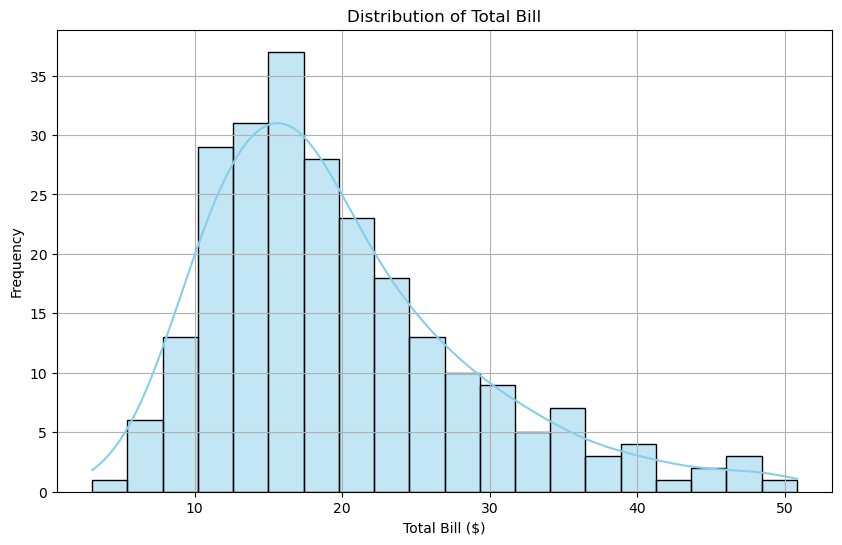

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='total_bill', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Total Bill')
plt.xlabel('Total Bill ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

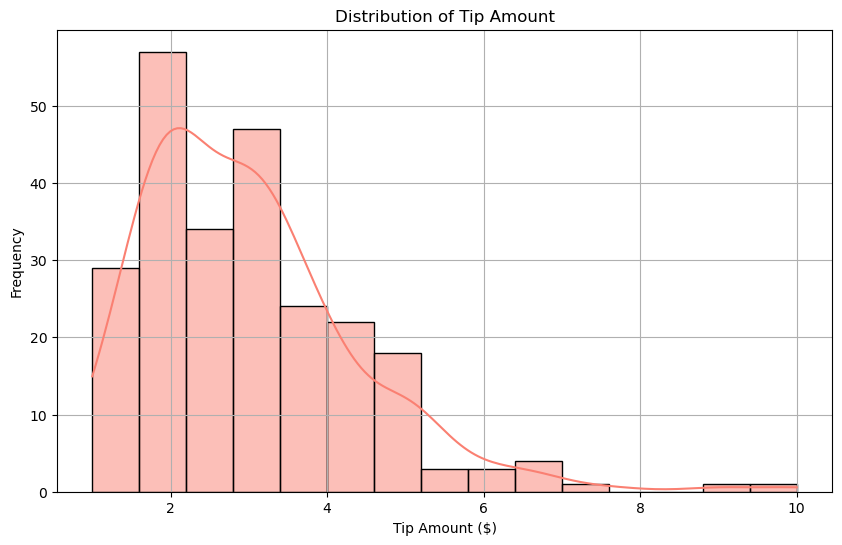

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tip', bins=15, kde=True, color='salmon')
plt.title('Distribution of Tip Amount')
plt.xlabel('Tip Amount ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# Scatterplot

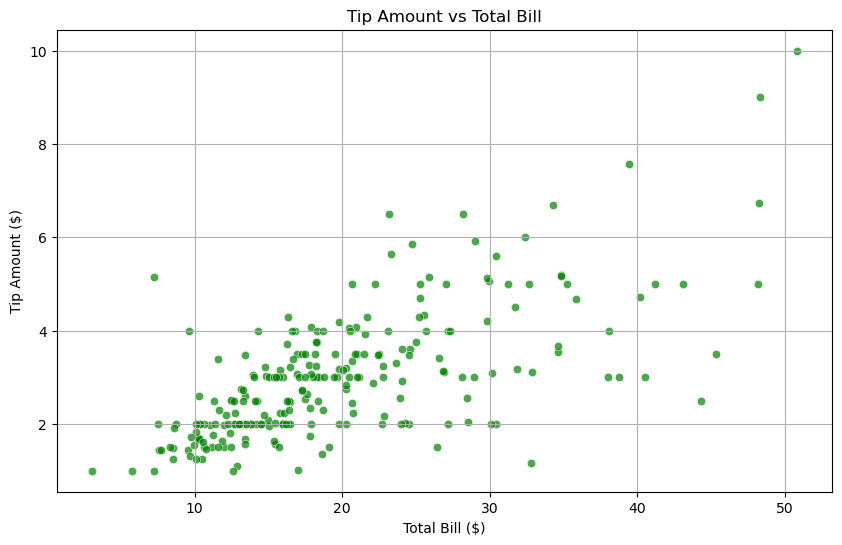

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_bill', y='tip', color='green', alpha=0.7)
plt.title('Tip Amount vs Total Bill')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip Amount ($)')
plt.grid(True)
plt.show()

# Boxplot

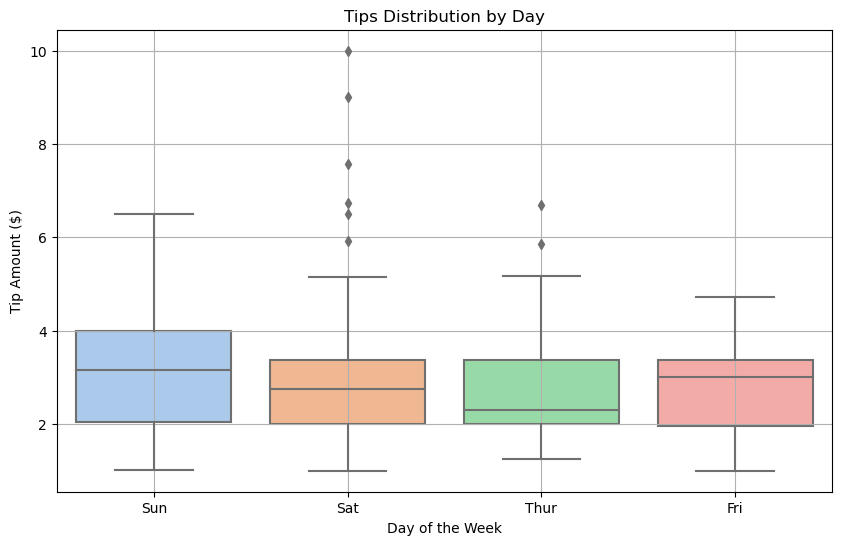

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='day', y='tip', palette='pastel')
plt.title('Tips Distribution by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Tip Amount ($)')
plt.grid(True)
plt.show()

# Pairplot

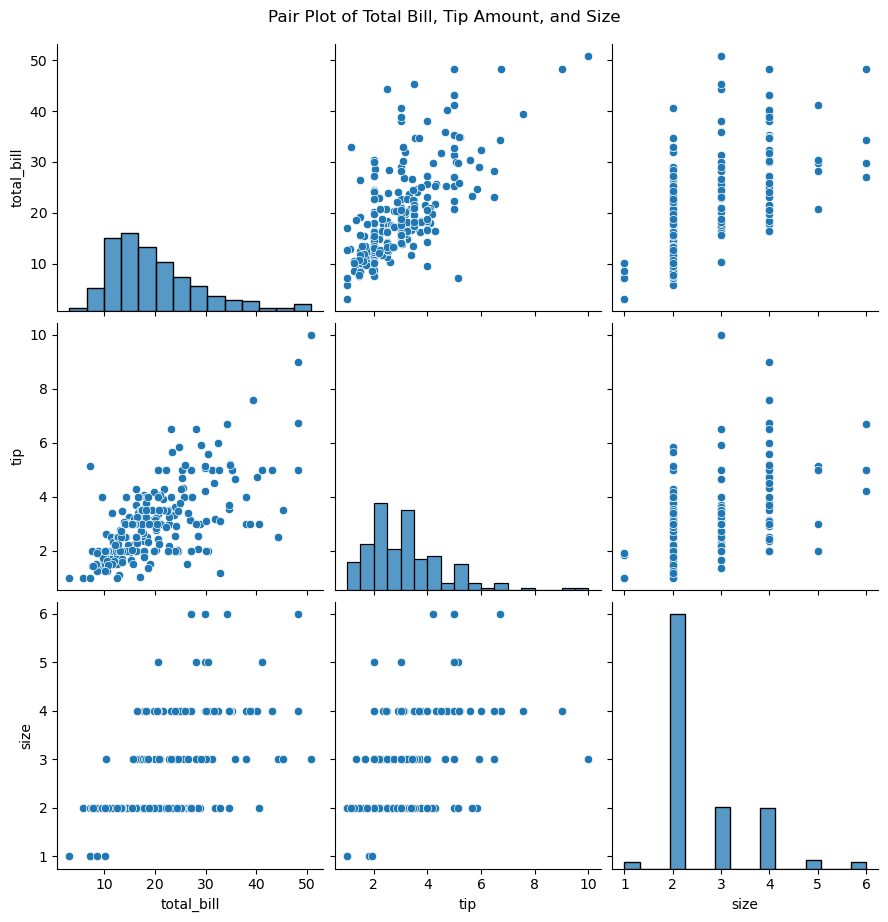

In [24]:
sns.pairplot(df[['total_bill', 'tip', 'size']], height=3)
plt.suptitle('Pair Plot of Total Bill, Tip Amount, and Size', y=1.02)
plt.show()